In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import math
from itertools import combinations
import time
import matplotlib.pyplot as plt
import random
seed = 1
random.seed(seed)
from data_spliter import split_data

In [13]:
x = np.load("X_train_regression1.npy")
y = np.load("y_train_regression1.npy")

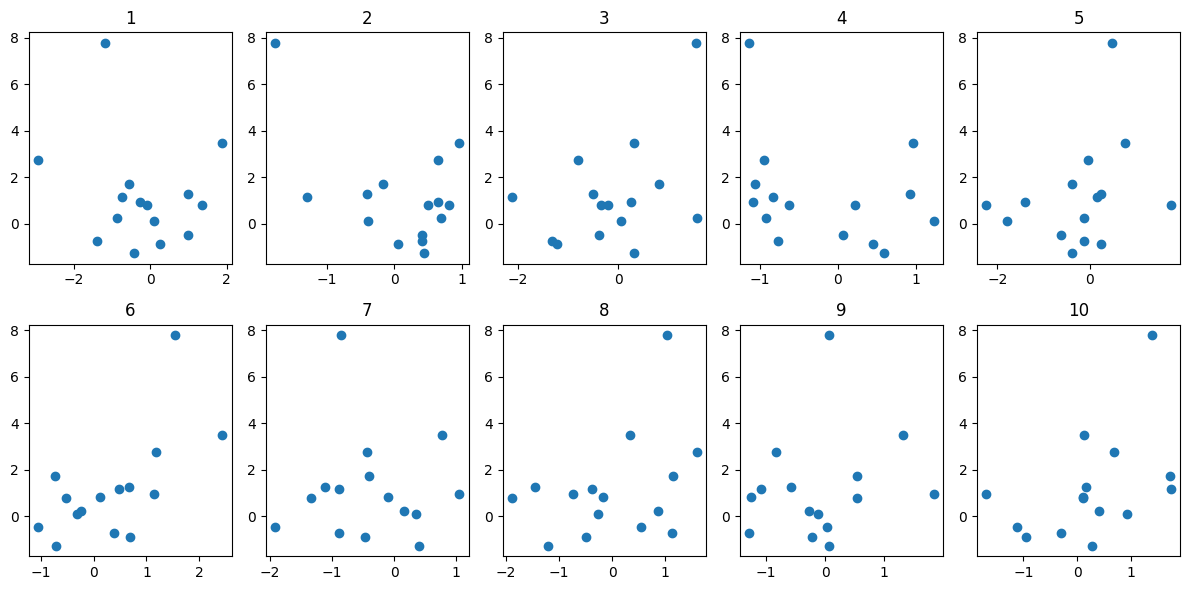

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# Plot data on each subplot
axs[0, 0].scatter([row[0] for row in x], y.T[0])
axs[0, 0].set_title('1')

axs[0, 1].scatter([row[1] for row in x], y.T[0])
axs[0, 1].set_title('2')

axs[0, 2].scatter([row[2] for row in x], y.T[0])
axs[0, 2].set_title('3')

axs[0, 3].scatter([row[3] for row in x], y.T[0])
axs[0, 3].set_title('4')

axs[0, 4].scatter([row[4] for row in x], y.T[0])
axs[0, 4].set_title('5')

axs[1, 0].scatter([row[5] for row in x], y.T[0])
axs[1, 0].set_title('6')

axs[1, 1].scatter([row[6] for row in x], y.T[0])
axs[1, 1].set_title('7')

axs[1, 2].scatter([row[7] for row in x], y.T[0])
axs[1, 2].set_title('8')

axs[1, 3].scatter([row[8] for row in x], y.T[0])
axs[1, 3].set_title('9')

axs[1, 4].scatter([row[9] for row in x], y.T[0])
axs[1, 4].set_title('10')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Remove retarded point
x = np.delete(x, 9, axis=0)
y = np.delete(y, 9, axis=0)

In [16]:
print(x)
print(y)

[[ 0.97944888  0.40699274 -0.37216774  0.06515514 -0.63079988 -1.0563022
  -1.92362878  0.54214261  0.03896113 -1.11701672]
 [-0.26561127  0.64806636  0.25696277 -1.09477292 -1.3989377   1.13579511
   1.0548696  -0.72956217  1.84105625 -1.69438106]
 [-0.54837272 -0.16447986  0.81072607 -1.06941183 -0.38175159 -0.73378422
  -0.39888904  1.14778468  0.53314397  1.73216042]
 [-0.09626796  0.81151461 -0.3401383   0.21657304  1.74636013  0.11314149
  -0.09827168 -0.1773942  -1.25702273  0.10334682]
 [-1.38067087  0.40834939 -1.31863872 -0.77263426 -0.1241566   0.38302958
  -0.88138889  1.11707251 -1.28904996 -0.30514985]
 [-0.72837104 -1.29008858 -2.10917246 -0.83085695  0.16236785  0.47102185
  -0.88723589 -0.37181692 -1.08027337  1.74711743]
 [ 1.88600201  0.96371032  0.30655672  0.96197556  0.7488291   2.43548358
   0.76507757  0.32878564  1.32267052  0.13800383]
 [-2.94138589  0.65255329 -0.78881525 -0.94596841 -0.0506776   1.17564066
  -0.43773996  1.58677239 -0.83703776  0.67957131]
 

In [17]:
values_ridge = []
values_lasso = []
values_elastic = []
subset_sizes = [2]

# Alphas values
start = 0.001
end = 10
step = 0.001
alphas = np.arange(start, end + step, step)

for subset_size in subset_sizes:
    x_test, x_train, y_test, y_train = split_data(x, y, subset_size)

    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        lasso = Lasso(alpha=alpha)
        elastic = ElasticNet(alpha=alpha)
        
        values_ridge_2 = []
        values_lasso_2 = []
        values_elastic_2 = []
        for i in range(len(x_train)):
            ridge.fit(x_train[i], y_train[i])
            y_pred = ridge.predict(x_test[i])
            values_ridge_2.append([r2_score(y_test[i], y_pred),sum((y_test[i] - y_pred)**2)[0]/subset_size])
            
            lasso.fit(x_train[i], y_train[i])
            y_pred = lasso.predict(x_test[i])
            values_lasso_2.append([r2_score(y_test[i], y_pred),sum((y_test[i] - y_pred)**2)[0]/subset_size])
            
            elastic.fit(x_train[i], y_train[i])
            y_pred = elastic.predict(x_test[i])
            values_elastic_2.append([r2_score(y_test[i], y_pred),sum((y_test[i] - y_pred)**2)[0]/subset_size])
            
            
        values_ridge.append([alpha,subset_size,sum([row[0] for row in values_ridge_2]) / len(values_ridge_2), sum([row[1] for row in values_ridge_2]) / len(values_ridge_2)])
        values_lasso.append([alpha,subset_size,sum([row[0] for row in values_lasso_2]) / len(values_lasso_2), sum([row[1] for row in values_lasso_2]) / len(values_lasso_2)])
        values_elastic.append([alpha,subset_size,sum([row[0] for row in values_elastic_2]) / len(values_elastic_2), sum([row[1] for row in values_elastic_2]) / len(values_elastic_2)])

with open("ridge2.txt", "w") as file:
    for alpha,subset_size,value1,value2 in values_ridge:
        file.write(f"{alpha}\t{subset_size}\t{value1}\t{value2}\n")
        
with open("lasso2.txt", "w") as file:
    for alpha,subset_size,value1,value2 in values_lasso:
        file.write(f"{alpha}\t{subset_size}\t{value1}\t{value2}\n")
        
with open("elastic2.txt", "w") as file:
    for alpha,subset_size,value1,value2 in values_elastic:
        file.write(f"{alpha}\t{subset_size}\t{value1}\t{value2}\n")
        
        
        

c:\Users\fjina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e-02, tolerance: 1.766e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\fjina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.500e-03, tolerance: 1.766e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\fjina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

KeyboardInterrupt: 